In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

## Create a dataset for polynomial regression

In [49]:
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100,1)

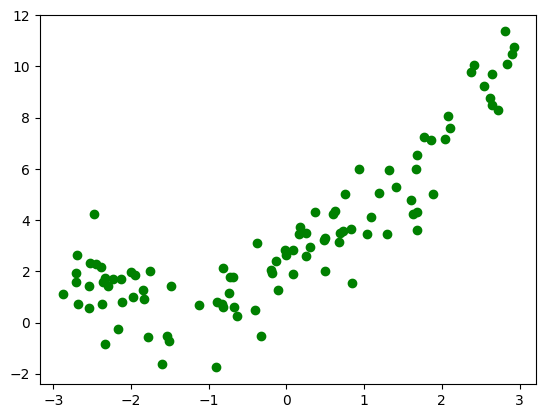

In [50]:
plt.scatter(X, y, color = 'g')

Now we will apply at first linear regression to check the error

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [53]:
regression.fit(X_train, y_train)

LinearRegression()

In [54]:
from sklearn.metrics import r2_score

score = r2_score(y_test, regression.predict(X_test))

In [55]:
score

0.6930615557533274

### visualize the model

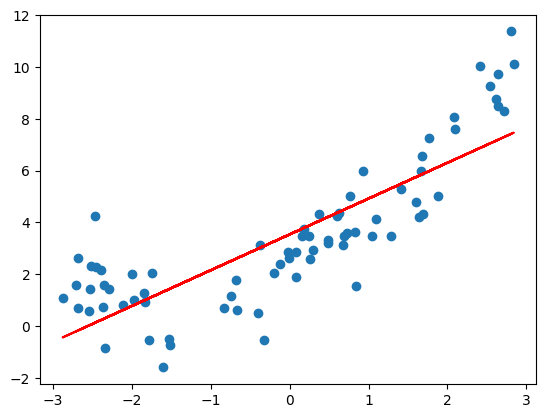

In [56]:
plt.plot(X_train, regression.predict(X_train), color = 'r')
plt.scatter(X_train, y_train)

## Too much Error
now we need to think about polynomial regression

In [57]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [58]:
X_train_poly

array([[ 1.00000000e+00, -1.75017919e+00,  3.06312720e+00],
       [ 1.00000000e+00,  6.22801837e-01,  3.87882128e-01],
       [ 1.00000000e+00, -2.00445180e+00,  4.01782703e+00],
       [ 1.00000000e+00,  6.03077688e-01,  3.63702698e-01],
       [ 1.00000000e+00,  8.40818845e-01,  7.06976330e-01],
       [ 1.00000000e+00, -2.70981019e+00,  7.34307127e+00],
       [ 1.00000000e+00,  7.83393243e-02,  6.13704974e-03],
       [ 1.00000000e+00, -3.06343871e-03,  9.38465670e-06],
       [ 1.00000000e+00, -1.60311616e+00,  2.56998141e+00],
       [ 1.00000000e+00,  1.41589014e+00,  2.00474488e+00],
       [ 1.00000000e+00, -1.28628904e-01,  1.65453948e-02],
       [ 1.00000000e+00,  4.80153333e-01,  2.30547223e-01],
       [ 1.00000000e+00,  2.56886223e-01,  6.59905316e-02],
       [ 1.00000000e+00,  1.67974047e+00,  2.82152805e+00],
       [ 1.00000000e+00,  3.66897023e-01,  1.34613426e-01],
       [ 1.00000000e+00, -2.88009222e+00,  8.29493122e+00],
       [ 1.00000000e+00,  1.58824514e-01

In [59]:
regression1 = LinearRegression()
regression1.fit(X_train_poly, y_train)
y_predict = regression1.predict(X_test_poly)

score = r2_score(y_test, y_predict)
print(score)

0.9056458818633595


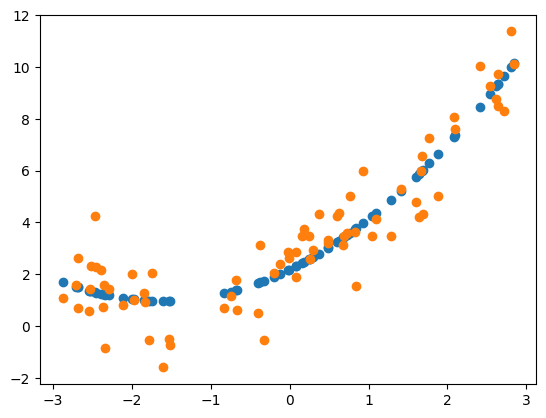

In [60]:
plt.scatter(X_train, regression1.predict(X_train_poly))
plt.scatter(X_train, y_train)

## pipelining Intro

In [61]:
from sklearn.pipeline import Pipeline

In [62]:
 def poly_regression(degree):
  X_new = np.linspace(-3, 3, 200).reshape(200,1)
  
  poly_features = PolynomialFeatures(degree=degree, include_bias=True)
  lin_reg = LinearRegression()
  poly_regression = Pipeline([
    ("poly_features", poly_features),
    ("lin_reg", lin_reg)
  ])
  poly_regression.fit(X_train, y_train)
  y_pred_new = poly_regression.predict(X_new)

  plt.plot(X_new, y_pred_new, 'r', label = "Degree "+ str(degree), linewidth = 3)
  plt.plot(X_train, y_train, 'b', linewidth = 3)
  plt.plot(X_test, y_test, 'g', linewidth = 3)
  plt.legend(loc= "upper left")
  plt.axis([-4,4, 0, 10])
  plt.show()


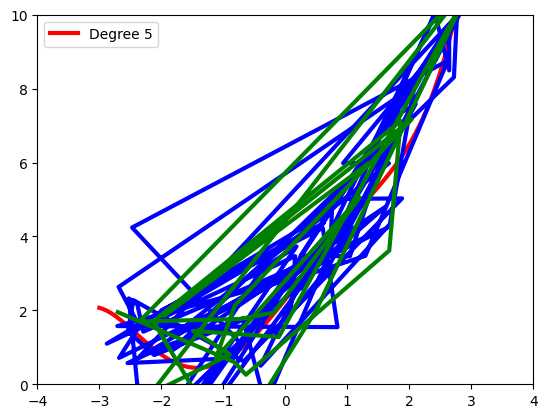

In [63]:
poly_regression(5)